<a href="https://colab.research.google.com/github/eireford/ConwayLifeTensorFlow/blob/master/LTF_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Life on TensorFlow
Use a hueristic implementation of the Game of Life algorythm to create a dataset to train a model that mimics the Life algorythm.
The convolutional network is able to learn the game of life rules from fewer then 40 examples.

In [1]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
import pathlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow.keras import models
from tensorflow.keras import layers

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
    '\n\nThis error most likely means that this notebook is not '
    'configured to use a GPU.  Change this in Notebook Settings via the '
    'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')
print(f"Found GPU at: {device_name}")

TensorFlow 2.x selected.
Found GPU at: /device:GPU:0


In [0]:
FEATURES_SHAPE = [1024,1024,1]
LABELS_SHAPE = [1024,1024,1]
SET_SIZE = 40

def random_uniform_grid(shape=FEATURES_SHAPE):
  return tf.round(tf.random.uniform(shape=shape,dtype=tf.float32))

In [0]:
def convolve_for_density_map(X):
  life_density_kernal = tf.constant([[[[1]],[[1]],[[1]]],
                                   [[[1]],[[10]],[[1]]],
                                   [[[1]],[[1]],[[1]]]],dtype=tf.float32)
  X_reshaped = tf.reshape(X,[1,X.shape[0],X.shape[1],1])
  density_map = tf.nn.conv2d(X_reshaped,life_density_kernal,[1,1,1,1],"SAME")
  density_map = tf.reshape(density_map,X.shape)
  return tf.round(density_map)

def will_be_alive(density_map):
  is_three = tf.equal(density_map,3.0)
  is_twelve = tf.equal(density_map,12.0)
  is_thirteen = tf.equal(density_map,13.0)
  any_true = is_three | is_twelve | is_thirteen
  return tf.cast(any_true,dtype=tf.float32)

def step(X):
  density_map = convolve_for_density_map(X)
  #print(density_map)
  return will_be_alive(density_map)

In [0]:
def get_data_examples(size = SET_SIZE):
  for i in range(size):
    X = random_uniform_grid()
    Y = step(X)
    yield X,Y

def get_dataset():
  #return tf.data.Dataset.from_generator(get_data_examples,(tf.float32,tf.float32),(tf.TensorShape(FEATURES_SHAPE),tf.TensorShape(LABELS_SHAPE)),output_shapes=(FEATURES_SHAPE,()))
  return tf.data.Dataset.from_generator(get_data_examples,(tf.float32,tf.float32),(tf.TensorShape(FEATURES_SHAPE),tf.TensorShape(LABELS_SHAPE)))
X_COMMON = get_dataset()

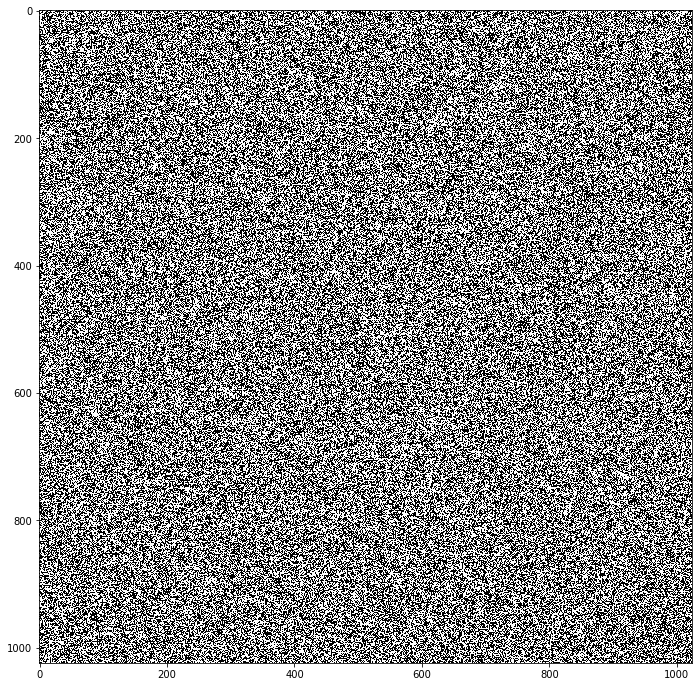

In [5]:
for element in X_COMMON: 
  e = element
  break
plt.gcf().set_size_inches(12,12)
figure_1 = plt.imshow(tf.squeeze(e[0]),cmap='Greys',origin='upper',interpolation='nearest')

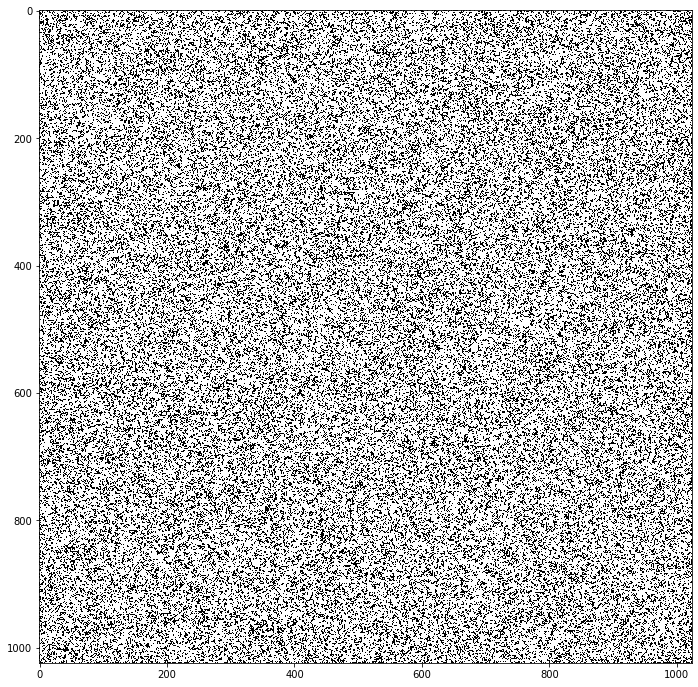

In [6]:
plt.gcf().set_size_inches(12,12)
figure_1 = plt.imshow(tf.squeeze(e[1]),cmap='Greys',origin='upper',interpolation='nearest')

In [0]:
model1 = models.Sequential()
model1.add(layers.Conv2D(16, (3, 3), padding='same',activation='relu', input_shape=FEATURES_SHAPE))
model1.add(layers.Dense(128, activation='relu'))
model1.add(layers.Dense(1))
model1.compile(optimizer=tf.keras.optimizers.Adam(0.01),
              loss='mse',
              metrics=['accuracy'])

In [8]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 1024, 1024, 16)    160       
_________________________________________________________________
dense (Dense)                (None, 1024, 1024, 128)   2176      
_________________________________________________________________
dense_1 (Dense)              (None, 1024, 1024, 1)     129       
Total params: 2,465
Trainable params: 2,465
Non-trainable params: 0
_________________________________________________________________


In [9]:
X_COMMON1 = X_COMMON.batch(4)
%time model1.fit(X_COMMON1,epochs=10)

Epoch 1/10
10/10 [==============================] - 2s 245ms/step - loss: 0.1997 - accuracy: 0.7312
Epoch 2/10
10/10 [==============================] - 2s 189ms/step - loss: 0.1451 - accuracy: 0.7888
Epoch 3/10
10/10 [==============================] - 2s 189ms/step - loss: 0.1300 - accuracy: 0.8022
Epoch 4/10
10/10 [==============================] - 2s 188ms/step - loss: 0.1178 - accuracy: 0.8299
Epoch 5/10
10/10 [==============================] - 2s 188ms/step - loss: 0.1005 - accuracy: 0.8620
Epoch 6/10
10/10 [==============================] - 2s 189ms/step - loss: 0.0721 - accuracy: 0.9195
Epoch 7/10
10/10 [==============================] - 2s 191ms/step - loss: 0.0349 - accuracy: 0.9910
Epoch 8/10
10/10 [==============================] - 2s 189ms/step - loss: 0.0173 - accuracy: 1.0000
Epoch 9/10
10/10 [==============================] - 2s 190ms/step - loss: 0.0089 - accuracy: 1.0000
Epoch 10/10
10/10 [==============================] - 2s 190ms/step - loss: 0.0038 - accuracy: 1.0000

In [0]:
testset = get_dataset()

In [11]:
testset1 = testset.batch(10)
model1.evaluate(testset1)

      4/Unknown - 2s 420ms/step - loss: 0.0025 - accuracy: 1.0000

[0.002544701157603413, 1.0]

In [0]:
model2 = models.Sequential()
model2.add(layers.Conv2D(16, (3, 3), padding='same',activation='relu', input_shape=FEATURES_SHAPE))
model2.add(layers.Dense(128, activation='relu'))
model2.add(layers.Dense(1))
model2.compile(optimizer=tf.keras.optimizers.Adam(0.01),
              loss='mse',
              metrics=['accuracy'])

In [13]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 1024, 1024, 16)    160       
_________________________________________________________________
dense_2 (Dense)              (None, 1024, 1024, 128)   2176      
_________________________________________________________________
dense_3 (Dense)              (None, 1024, 1024, 1)     129       
Total params: 2,465
Trainable params: 2,465
Non-trainable params: 0
_________________________________________________________________


In [14]:
X_COMMON2 = X_COMMON.batch(4)
%time model2.fit(X_COMMON2,epochs=10)

Epoch 1/10
10/10 [==============================] - 2s 221ms/step - loss: 0.1989 - accuracy: 0.7255
Epoch 2/10
10/10 [==============================] - 2s 189ms/step - loss: 0.1496 - accuracy: 0.7735
Epoch 3/10
10/10 [==============================] - 2s 189ms/step - loss: 0.1299 - accuracy: 0.7957
Epoch 4/10
10/10 [==============================] - 2s 188ms/step - loss: 0.1130 - accuracy: 0.8380
Epoch 5/10
10/10 [==============================] - 2s 189ms/step - loss: 0.0935 - accuracy: 0.8974
Epoch 6/10
10/10 [==============================] - 2s 188ms/step - loss: 0.0748 - accuracy: 0.9199
Epoch 7/10
10/10 [==============================] - 2s 188ms/step - loss: 0.0544 - accuracy: 0.9543
Epoch 8/10
10/10 [==============================] - 2s 189ms/step - loss: 0.0346 - accuracy: 0.9810
Epoch 9/10
10/10 [==============================] - 2s 189ms/step - loss: 0.0208 - accuracy: 0.9957
Epoch 10/10
10/10 [==============================] - 2s 188ms/step - loss: 0.0115 - accuracy: 0.9996

In [15]:
testset2 = testset.batch(10)
model2.evaluate(testset2)

      4/Unknown - 1s 269ms/step - loss: 0.0079 - accuracy: 1.0000

[0.007902861339971423, 1.0]

In [0]:
model3 = models.Sequential()
model3.add(layers.Conv2D(16, (3, 3), padding='same',activation='relu', input_shape=FEATURES_SHAPE))
model3.add(layers.Dense(128, activation='relu'))
model3.add(layers.Dense(1))
model3.compile(optimizer=tf.keras.optimizers.Adam(0.01),
              loss='mse',
              metrics=['accuracy'])

In [17]:
X_COMMON3 = X_COMMON.batch(4)
%time model3.fit(X_COMMON3,epochs=10)

Epoch 1/10
10/10 [==============================] - 2s 219ms/step - loss: 0.2084 - accuracy: 0.7175
Epoch 2/10
10/10 [==============================] - 2s 187ms/step - loss: 0.1403 - accuracy: 0.7968
Epoch 3/10
10/10 [==============================] - 2s 187ms/step - loss: 0.1193 - accuracy: 0.8274
Epoch 4/10
10/10 [==============================] - 2s 187ms/step - loss: 0.1013 - accuracy: 0.8787
Epoch 5/10
10/10 [==============================] - 2s 187ms/step - loss: 0.0831 - accuracy: 0.9104
Epoch 6/10
10/10 [==============================] - 2s 188ms/step - loss: 0.0569 - accuracy: 0.9467
Epoch 7/10
10/10 [==============================] - 2s 187ms/step - loss: 0.0282 - accuracy: 0.9879
Epoch 8/10
10/10 [==============================] - 2s 187ms/step - loss: 0.0145 - accuracy: 0.9988
Epoch 9/10
10/10 [==============================] - 2s 187ms/step - loss: 0.0066 - accuracy: 1.0000
Epoch 10/10
10/10 [==============================] - 2s 187ms/step - loss: 0.0033 - accuracy: 1.0000

In [18]:
testset3 = testset.batch(10)
model3.evaluate(testset3)

      4/Unknown - 1s 274ms/step - loss: 0.0023 - accuracy: 1.0000

[0.0023075537174008787, 1.0]